# Cifer-10のクラス分類 ベンチマーク
* ベンチマーク用
* 参考CIFAR-10でaccuracy95%--CNNで精度を上げるテクニック 
    * https://qiita.com/yy1003/items/c590d1a26918e4abe512
* Adam 学習率はデフォルト
* データ拡張なし
* 10epochs

In [1]:
# GPU無効化
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import SGD, Adam
from keras.utils import plot_model

In [5]:
import tensorflow as tf
print(tf.__version__) # 2.4.1

2.4.1


In [6]:
print(keras.__version__) # 2.4.3

2.4.3


In [7]:
img_rows, img_cols, img_channels = 32, 32, 3
num_classes = 10
batch_size = 64

In [8]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
print('x_train.shape', x_train.shape)
# ('x_train.shape', (50000, 32, 32, 3))

x_train.shape (50000, 32, 32, 3)


In [10]:
print('y_train.shape', y_train.shape)
# ('y_train.shape', (50000, 10))

y_train.shape (50000, 10)


In [11]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

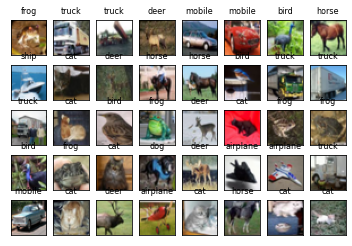

In [12]:
LABELS = ('airplane', 'mobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse','ship', 'truck')

def index_to_label(idx):
  if idx < len(LABELS):
    return LABELS[idx]
  else:
    return None

def vector_to_label(v):
  idx = np.argmax(v)
  return index_to_label(idx)
  
plt.clf()
for i in range(0, 40):
  plt.subplot(5, 8, i+1)
  pixels = x_train[i,:,:,:]
  plt.title(vector_to_label(y_train[i]), fontsize=8)
  fig = plt.imshow(pixels)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

plt.savefig('cifar10_image_train.png')

In [13]:
print(y_train[0:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
print(type(y_train))

<class 'numpy.ndarray'>


In [15]:
model = Sequential()

In [16]:
# CNN layer 1
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D())

# CNN layer 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D())

# CNN layer 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D())

# output
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [18]:
model.compile(
loss='categorical_crossentropy', # 損失関数の設定
optimizer=Adam(), # 最適化法の指定 Adam 学習率デフォルト
metrics=['accuracy'])

In [19]:
# 時間計測
import time
start_time = time.time()

In [20]:
fit = model.fit(x_train, y_train,
              batch_size=512,
              epochs=10,
              verbose=1,
              validation_split=0.1 # 今回は訓練データセットの10%をvalidationデータセットとして使う
                )

Epoch 1/10
88/88 [==============================] - 21s 190ms/step - loss: 2.2015 - accuracy: 0.1483 - val_loss: 1.8463 - val_accuracy: 0.2940
Epoch 2/10
88/88 [==============================] - 12s 132ms/step - loss: 1.7523 - accuracy: 0.3188 - val_loss: 1.5965 - val_accuracy: 0.4240
Epoch 3/10
88/88 [==============================] - 12s 133ms/step - loss: 1.4916 - accuracy: 0.4372 - val_loss: 1.3354 - val_accuracy: 0.5154
Epoch 4/10
88/88 [==============================] - 12s 133ms/step - loss: 1.2790 - accuracy: 0.5276 - val_loss: 1.2781 - val_accuracy: 0.5514
Epoch 5/10
88/88 [==============================] - 12s 134ms/step - loss: 1.1234 - accuracy: 0.5862 - val_loss: 1.0985 - val_accuracy: 0.6138
Epoch 6/10
88/88 [==============================] - 12s 134ms/step - loss: 1.0150 - accuracy: 0.6352 - val_loss: 1.0915 - val_accuracy: 0.6134
Epoch 7/10
88/88 [==============================] - 12s 135ms/step - loss: 0.9435 - accuracy: 0.6664 - val_loss: 0.8860 - val_accuracy: 0.7092

In [21]:
# 計測した結果を出力
tat_time = time.time() - start_time
print ("実行時間:{0}".format(tat_time) + "[秒]")

実行時間:128.62278509140015[秒]


<Figure size 432x288 with 0 Axes>

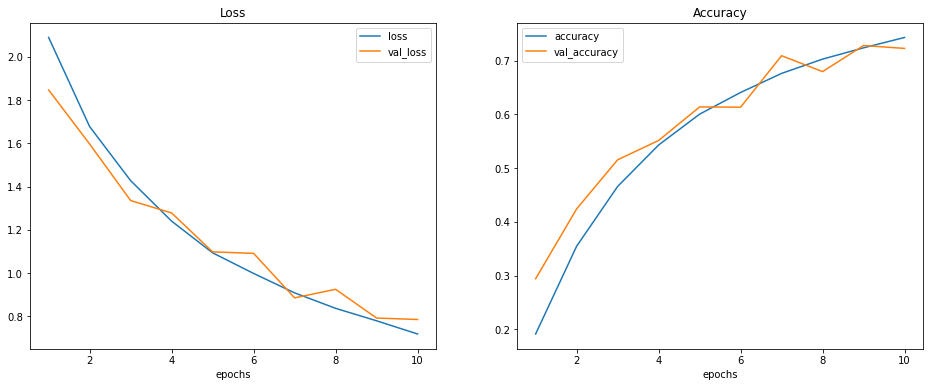

In [22]:
plt.clf()
fig,ax=plt.subplots(1,2, figsize=(16.0, 6.0))
ax[0].set_xlabel('epochs')
ax[0].plot(np.arange(1, len(fit.history['loss'])+1),
         fit.history['loss'], label='loss')
ax[0].plot(np.arange(1, len(fit.history['loss'])+1),
         fit.history['val_loss'], label='val_loss')
ax[0].set_title("Loss")
ax[0].legend()
ax[1].set_xlabel('epochs')
ax[1].plot(np.arange(1, len(fit.history['accuracy'])+1),
         fit.history['accuracy'], label='accuracy')
ax[1].plot(np.arange(1, len(fit.history['accuracy'])+1),
         fit.history['val_accuracy'], label='val_accuracy')
ax[1].set_title("Accuracy")
ax[1].legend()
plt.show()

In [23]:
score = model.evaluate(x_test, y_test,
                    verbose=0
                    )

print('Test Loss score:', score[0])
print('Test accuracy:', score[1])

Test Loss score: 0.8191083669662476
Test accuracy: 0.7093999981880188


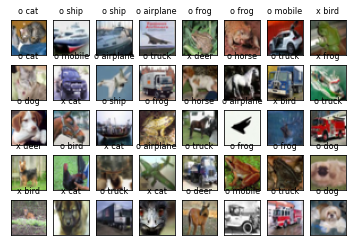

In [24]:
y_predicted = model.predict(x_test)

plt.clf()
for i in range(0, 40):
  plt.subplot(5, 8, i+1)
  pixels = x_test[i,:,:,:]
  isok = np.argmax(y_test[i]) == np.argmax(y_predicted[i])
  plt.title('{} {}'.format('o' if isok else 'x',
                           vector_to_label(y_predicted[i])),
			fontsize=8)
  fig = plt.imshow(pixels)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

plt.savefig('cifar10-model1-predicted.png')

In [25]:
# 推測結果をクラスラベルへ変換
y_pred_CNN = np.argmax(y_predicted, axis=1)
y_test_CNN = np.argmax(y_test, axis=1)

In [26]:
print(confusion_matrix(y_test_CNN,y_pred_CNN))

[[792  21  82  23  11   0  12   5  35  19]
 [ 13 885   1  16   2   1  12   2  14  54]
 [ 61   1 694  59  66   6  97  10   2   4]
 [ 15   2 127 601  54  24 147  17   8   5]
 [ 18   3 141  45 608   1 147  32   3   2]
 [  4   3  93 416  59 306  77  35   6   1]
 [  3   0  49  42  14   1 887   1   2   1]
 [ 12   3  83  82 105  15  11 679   0  10]
 [ 93  23  21  22   2   1  10   1 812  15]
 [ 37  66   8  15   4   1  17   8  14 830]]


In [27]:
print(accuracy_score(y_test_CNN,y_pred_CNN))

0.7094


In [28]:
plt.savefig('model-loss-accuracy.png')

<Figure size 432x288 with 0 Axes>